In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")
import sys
sys.path.append('/content/gdrive/My Drive/QRC')

Mounted at /content/gdrive/


In [2]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import gca
from scipy.optimize import curve_fit

In [3]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [4]:
reg = 10**-8
ones = np.ones((200, 1))

def generalization(results, y_true):
    X = results.reshape(200, -1)
    reg_eye = reg*np.eye(X.shape[-1] + 1)
    X = np.concatenate((X, ones), axis=1)
    X_train = X[:100]
    W = np.linalg.inv(X_train.T @ X_train + reg_eye) @ X_train.T @ y_true
    return X[100:] @ W

def gen_loss(results, signal, offset):
    return np.linalg.norm(generalization(results, signal[1000-offset:1100-offset]) - signal[1100-offset:1200-offset])

def memory_acc(results, signal, offset):
    gen = generalization(results, signal[1000-offset:1100-offset])
    y_true = signal[1100-offset:1200-offset]
    return (np.mean(gen * y_true) - np.mean(gen) * np.mean(y_true))**2/np.var(gen)/np.var(y_true)

def narma_acc(results, signal):
    res = generalization(results, signal[1000-1:1100-1])
    y_true = signal[1100-1:1200-1]
    return np.sum((res - y_true)**2)/np.sum(y_true**2)

In [5]:
# def sigmoid(x, a, b, c, d):
#     res = a + b * (1/ (1 + np.exp(c * x + d)))
#     return res

# def sigmoid_grad(x, a, b, c, d):
#     return -b * c * np.exp(c * x + d)/(1 + np.exp(c * x + d))**2

# def approximate(res):
#     par = [1, 0.5, 3, -3]
#     d = np.arange(len(res))
#     optimal_par, _ = curve_fit(sigmoid, np.concatenate((np.arange(4) - 3, d), axis=0), np.concatenate((np.ones((6,)), res[2:]), axis=0), par)
#     return sigmoid(d, *optimal_par), -sigmoid_grad(d, *optimal_par)

In [6]:
signals = np.load('/content/gdrive/My Drive/QRC/ArticleProduction/Data/Signals/BINARY_SIGNALS.npy')

In [7]:
setups = ["33", "34", "43", "52"]
dps = [0, 0.001, 0.01, 0.1, 0.5]
colormap = dict(zip(setups, ("#74C265", "#FF9933", "#D1AA9F", "#C54C36")))
colormap_dp = dict(zip(dps, ("#74C265", "#FF9933", "#D1AA9F", "#005394", "#C54C36")))

In [9]:
colormap

{'33': '#74C265', '34': '#FF9933', '43': '#D1AA9F', '52': '#C54C36'}

In [ ]:
def get_metrics(data):
    loss = []
    MA = []
    for i in range(signals.shape[0]):
        loss.append(np.array([gen_loss(data[i], signals[i], offset) for offset in range(30)]))
        MA.append(np.array([memory_acc(data[i], signals[i], offset) for offset in range(30)]))
    
    return loss, MA

In [ ]:
# Preset plot visuals
def plot_data(data, ax, color):
    x = np.arange(30)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    ax.plot(mean, linewidth=4, color=color, marker ='o', markersize=15, linestyle='-')
    ax.fill_between(x, mean - std, mean + std, color=color, alpha=0.2)
    ax.plot(mean - std, color=color, linestyle='--')
    ax.plot(mean + std, color=color, linestyle='--')

In [ ]:
learning_type = "ALL_LEARNING"
#learning_type = "CROSSLEARNING"
purification = False

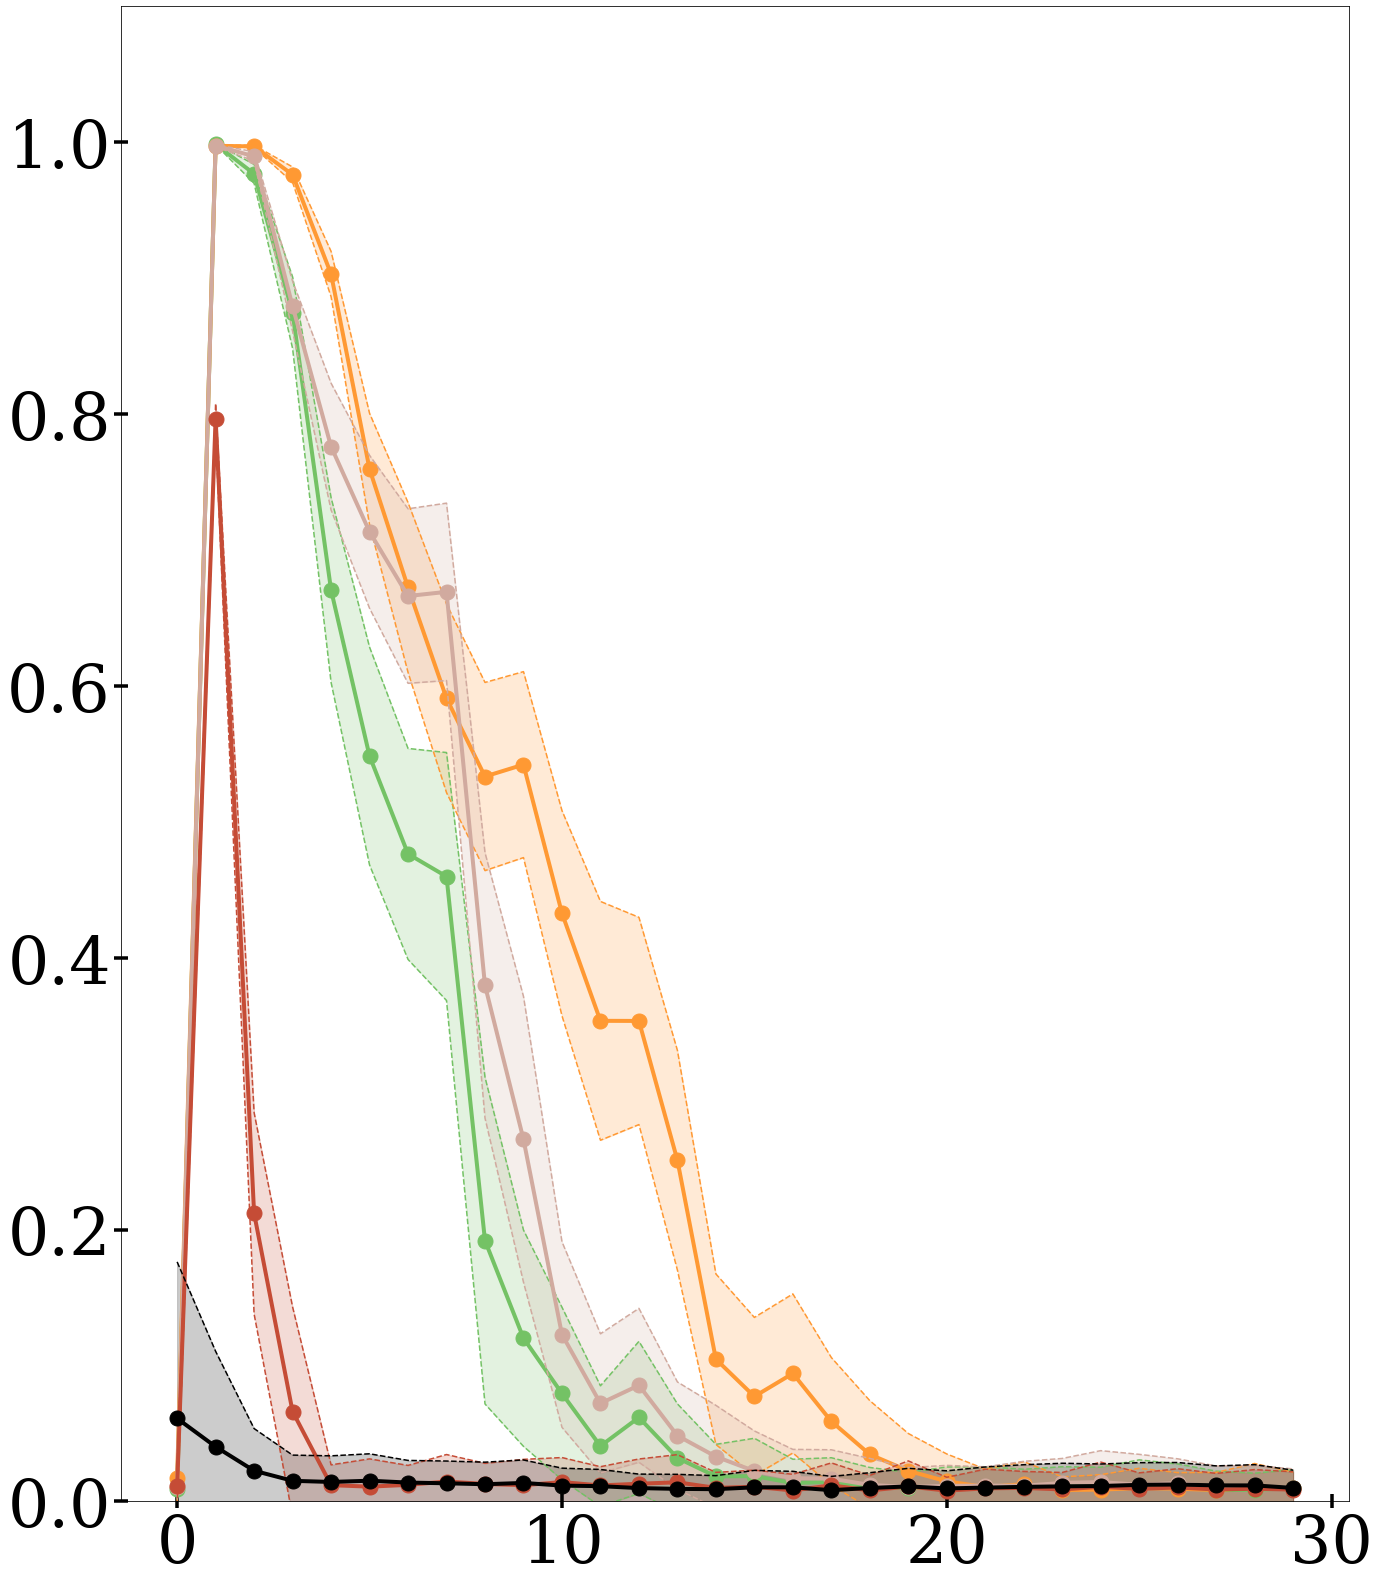

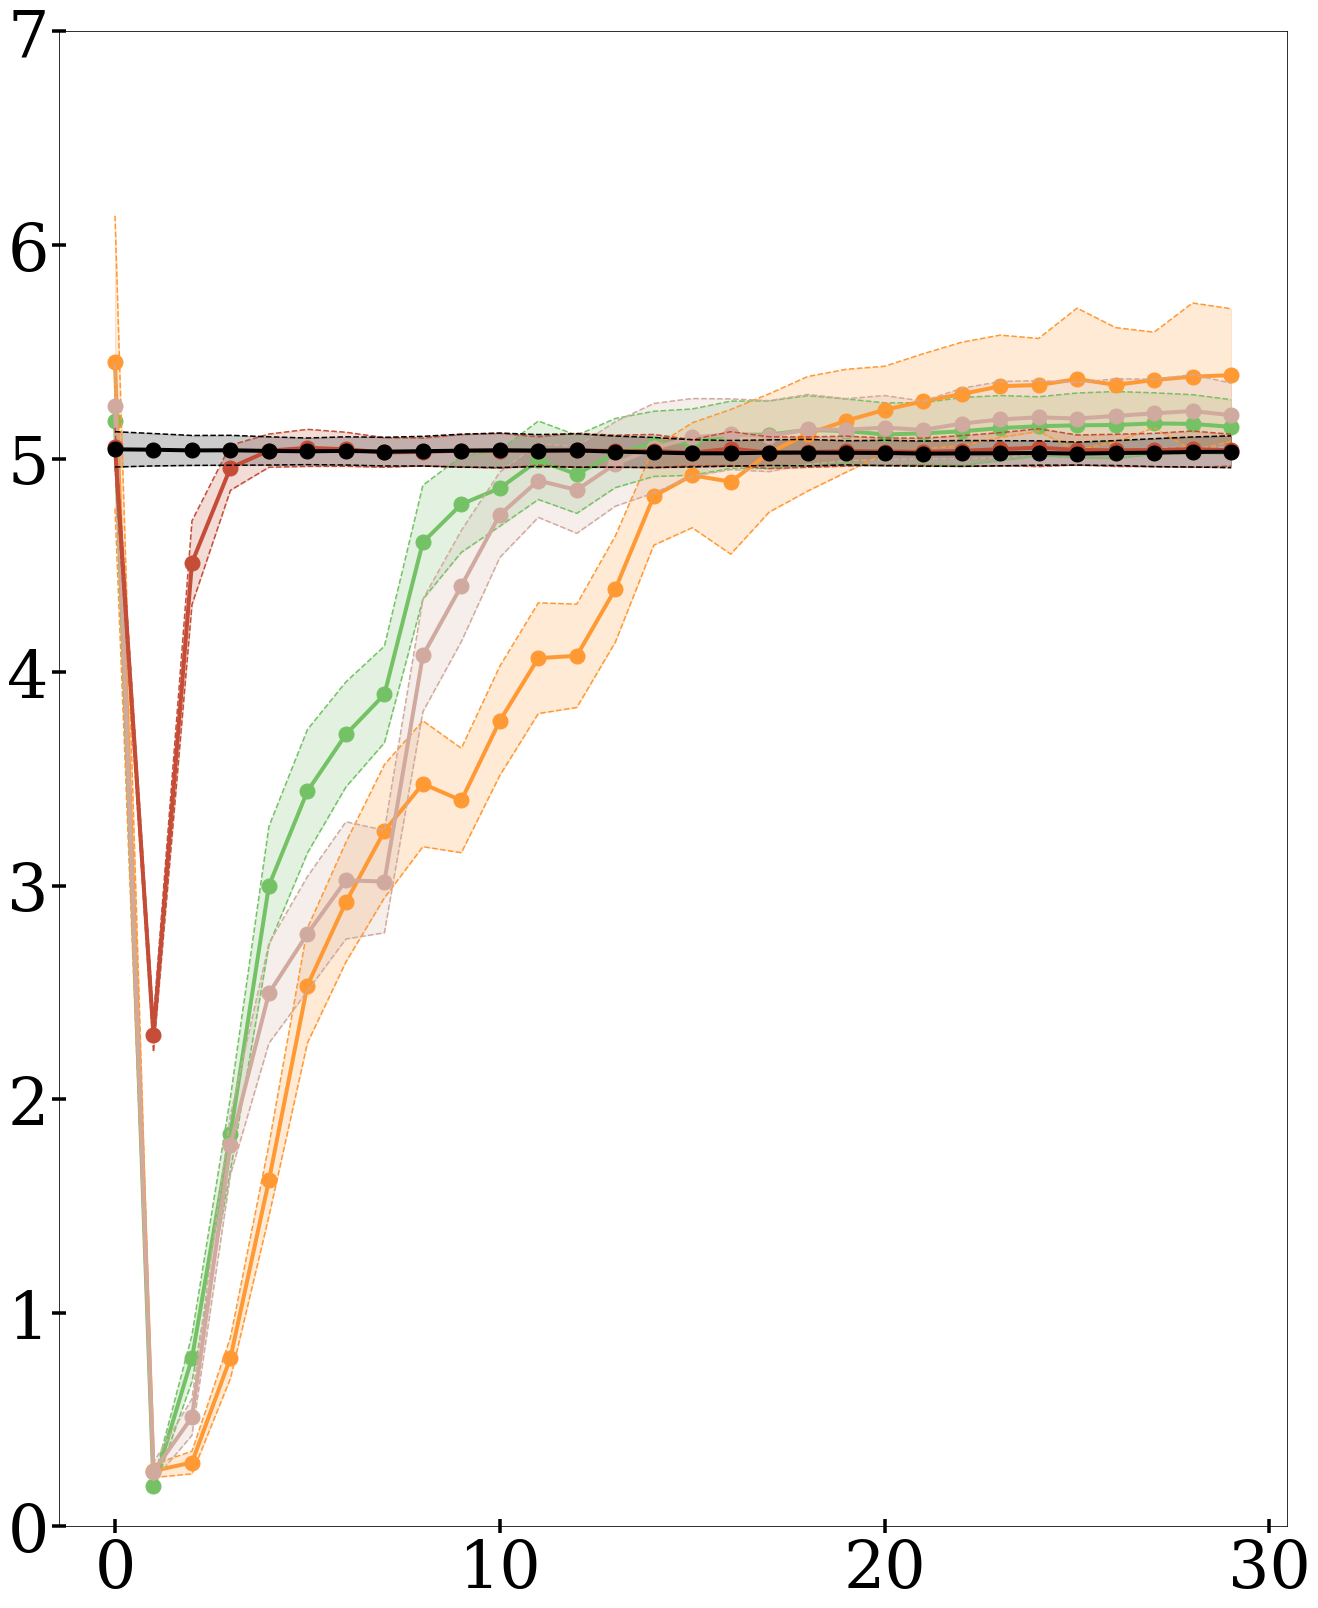

In [ ]:
fig1, ax1 = plt.subplots(figsize = (22,27.5))
ax1.tick_params(axis='both', which='major', labelsize=65, width = 3.5, length = 14, direction = 'inout')
ax1.set_ylim(0, 1.1)

fig2, ax2 = plt.subplots(figsize = (22,27.5))
ax2.tick_params(axis='both', which='major', labelsize=65, width = 3.5, length = 14, direction = 'inout')
ax2.set_ylim(0, 7)

for setup in setups:
    data = np.load(
        f'/content/gdrive/My Drive/QRC/ArticleProduction/Data/{"Results" if purification else "NoPurification"}/{learning_type}_{setup}_depol0.npy'
    )
    loss, MA = get_metrics(data)
    plot_data(MA, ax1, colormap[setup])
    plot_data(loss, ax2, colormap[setup])

if learning_type == "CROSSLEARNING":
    data = np.load(
        f'/content/gdrive/My Drive/QRC/ArticleProduction/Data/{"Results" if purification else "NoPurification"}/SEPARABLE_CROSSLEARNING_34_depol0.npy'
    )
    loss, MA = get_metrics(data)
    plot_data(MA, ax1, "#000000")
    plot_data(loss, ax2, "#000000")
    

fig1.savefig(
    f'/content/gdrive/My Drive/QRC/ArticleProduction/Plots/{learning_type}_{"P" if purification else "NP"}_MA.svg',
    format='svg',
    dpi=500
)
fig2.savefig(
    f'/content/gdrive/My Drive/QRC/ArticleProduction/Plots/{learning_type}_{"P" if purification else "NP"}_LA.svg',
    format='svg',
    dpi=500
)

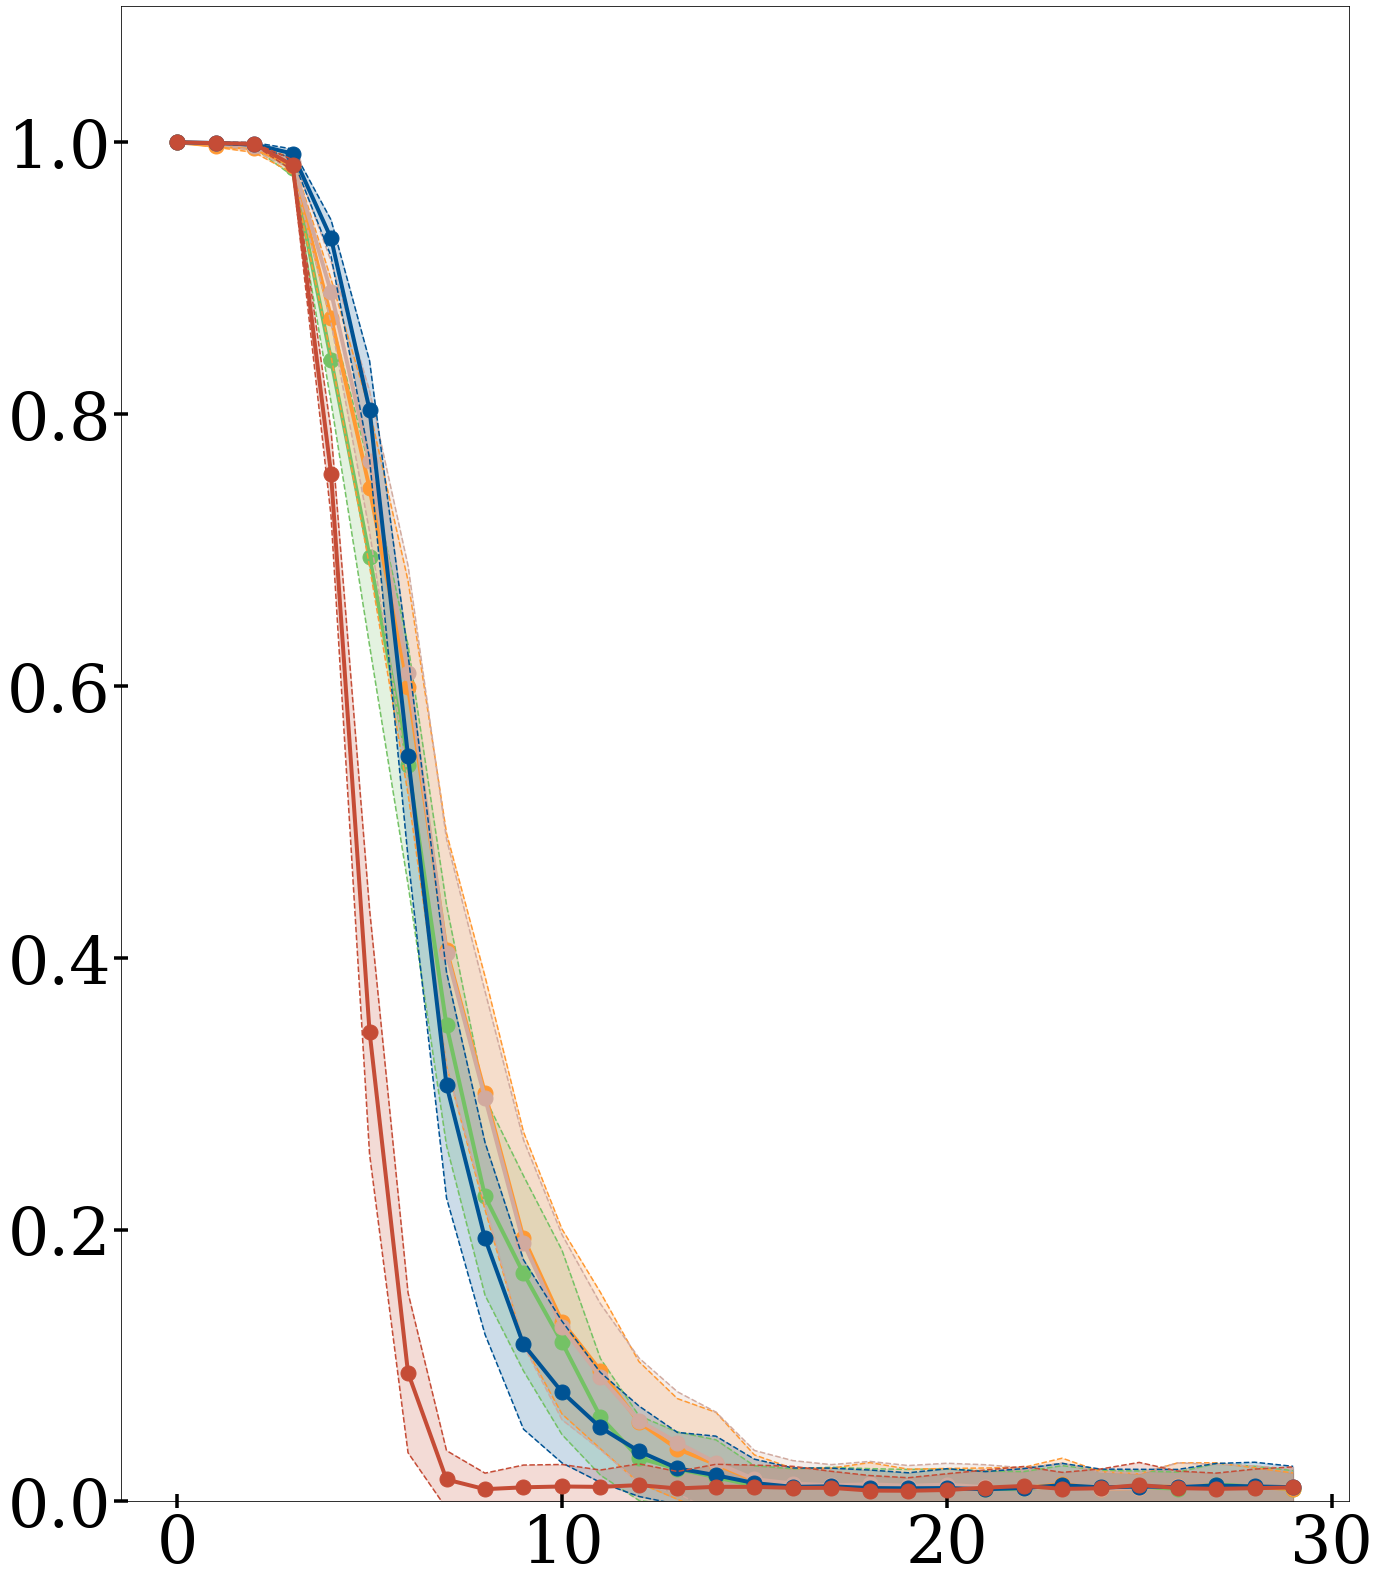

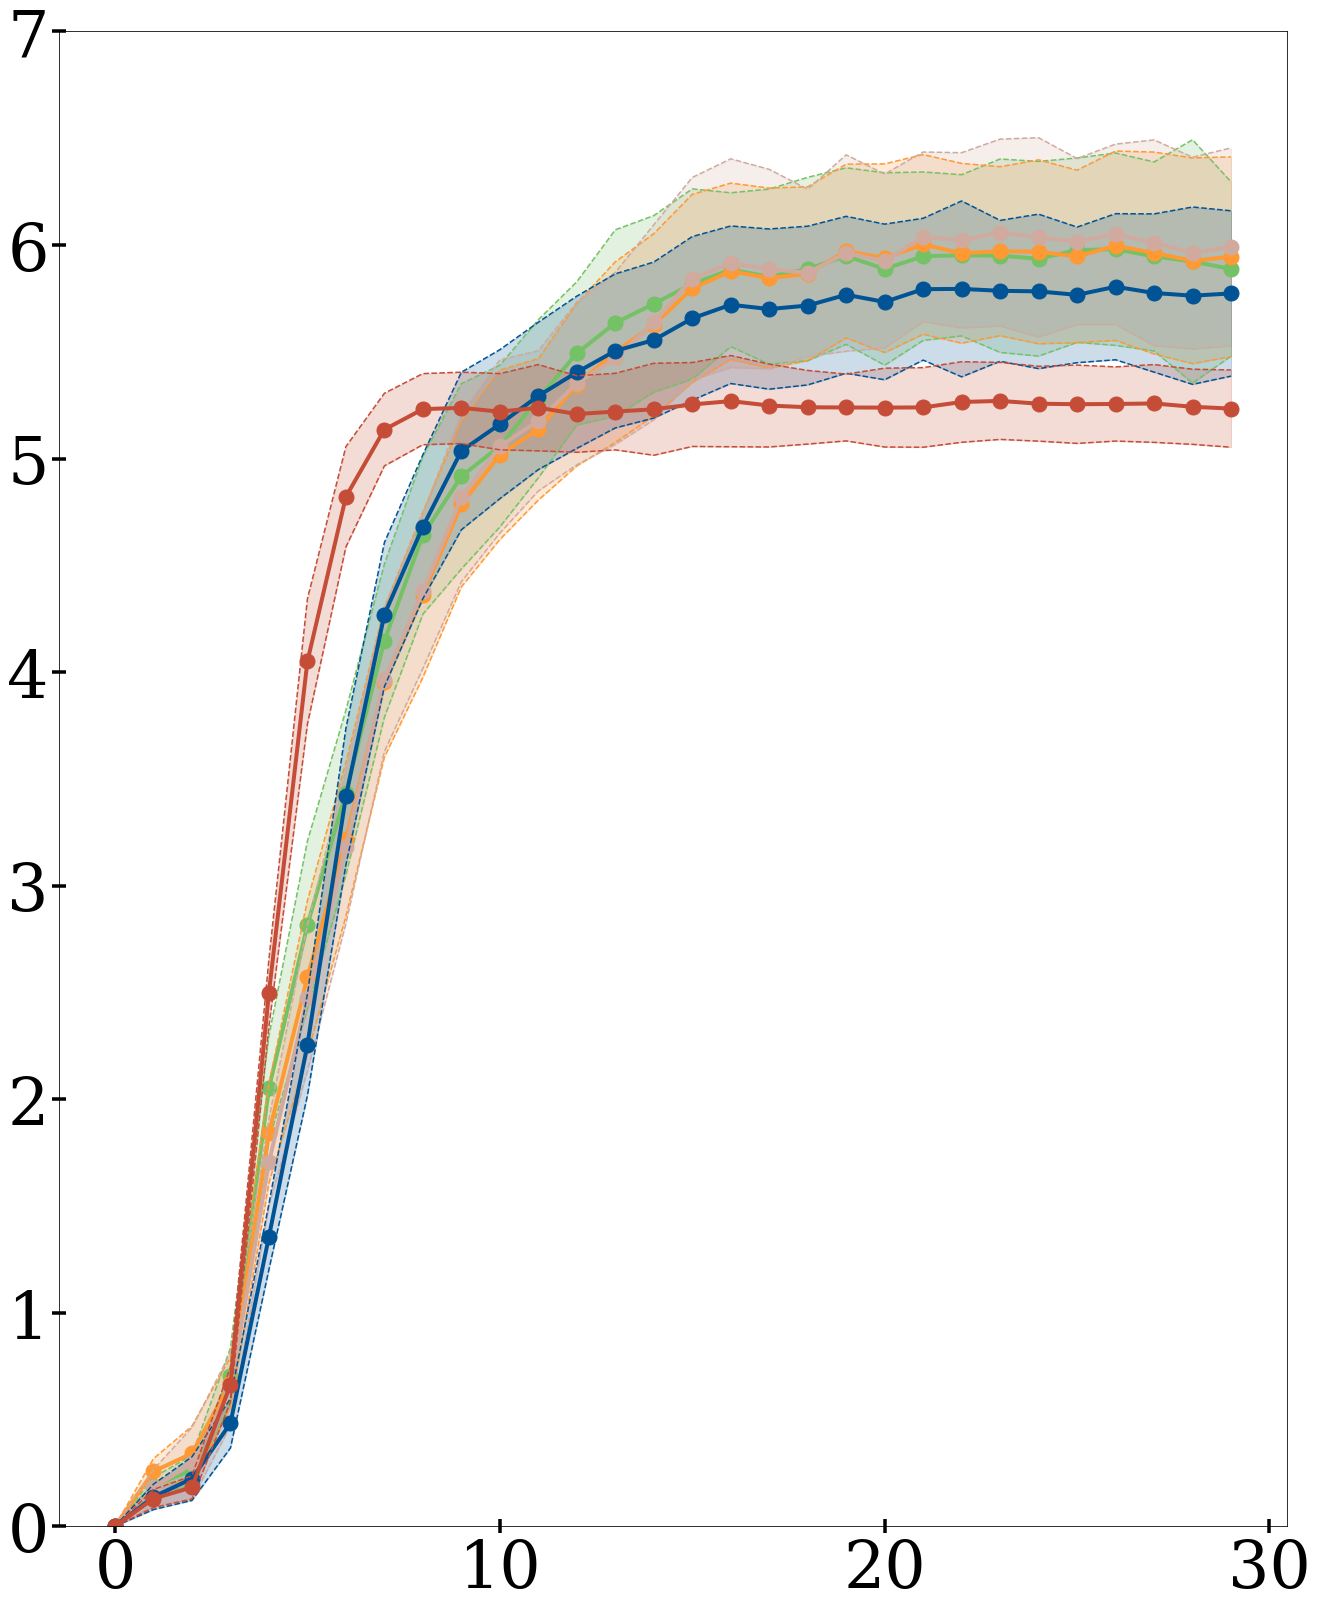

In [ ]:
fig1, ax1 = plt.subplots(figsize = (22,27.5))
ax1.tick_params(axis='both', which='major', labelsize=65, width = 3.5, length = 14, direction = 'inout')
ax1.set_ylim(0, 1.1)

fig2, ax2 = plt.subplots(figsize = (22,27.5))
ax2.tick_params(axis='both', which='major', labelsize=65, width = 3.5, length = 14, direction = 'inout')
ax2.set_ylim(0, 7)

for dp in dps:
    data = np.load(
        f'/content/gdrive/My Drive/QRC/ArticleProduction/Data/{"Results" if purification else "NoPurification"}/{learning_type}_34_depol{dp}.npy'
    )
    loss, MA = get_metrics(data)
    plot_data(MA, ax1, colormap_dp[dp])
    plot_data(loss, ax2, colormap_dp[dp])

fig1.savefig(
    f'/content/gdrive/My Drive/QRC/ArticleProduction/Plots/{learning_type}_{"P" if purification else "NP"}_DP_MA.svg',
    format='svg',
    dpi=500
)
fig2.savefig(
    f'/content/gdrive/My Drive/QRC/ArticleProduction/Plots/{learning_type}_{"P" if purification else "NP"}_DP_LA.svg',
    format='svg',
    dpi=500
)

In [ ]:
reg = 10**-12

def learning(data, idx, offset):
    X = data[idx].reshape(200, -1)
    reg_eye = reg*np.eye(X.shape[-1] + 1)
    X = np.concatenate((X, ones), axis=1)
    X_train = X[:100]
    W = np.linalg.inv(X_train.T @ X_train + reg_eye) @ X_train.T @ signals[idx][1000-offset:1100-offset]
    return X[:100] @ W, X[100:] @ W

In [ ]:
data = np.load(
    f'/content/gdrive/My Drive/QRC/ArticleProduction/Data/Results/ALL_LEARNING_34_depol0.npy'
)

In [ ]:
idx, offset = 10, 7
res, gen = learning(data, idx, offset)

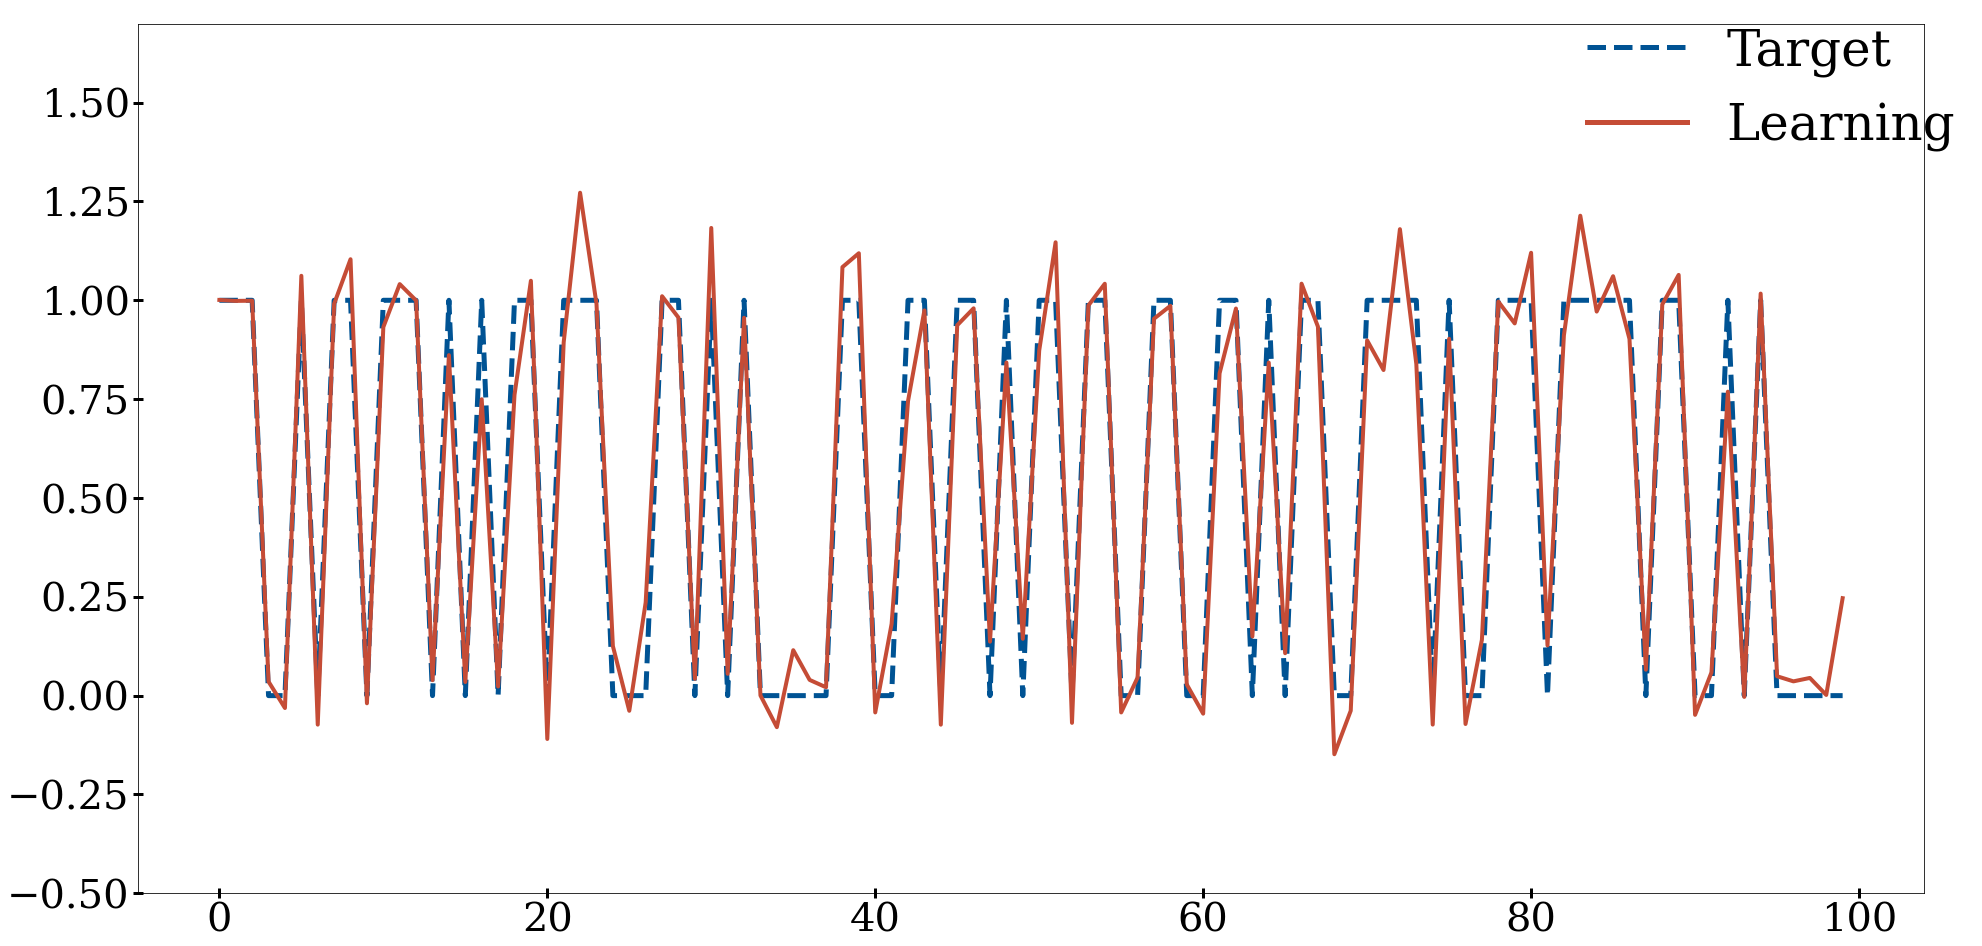

In [ ]:
# LEARNING EVALUATION
fig = plt.figure(figsize = (32, 16))
font1 = {
        'weight': 'normal',
        'size': 50,
        }
ax = plt.subplot(111)
ax.tick_params(axis='both', which='major', labelsize=40, width = 3, length = 10, direction = 'inout')
ax.set_ylim(-0.5, 1.7)
plt.plot(signals[idx][1000-offset:1100-offset], label = 'Target', linewidth=5, linestyle = '--', color = '#005394')
plt.plot(res, label = 'Learning',linewidth=4, color = '#C54C36')
leg = plt.legend(frameon=False, loc=(0.8,0.83), prop = font1)
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=5)
fig.savefig(f'/content/gdrive/My Drive/QRC/ArticleProduction/Plots/LEARNING_PLOT_34.svg', format='svg', dpi=500)

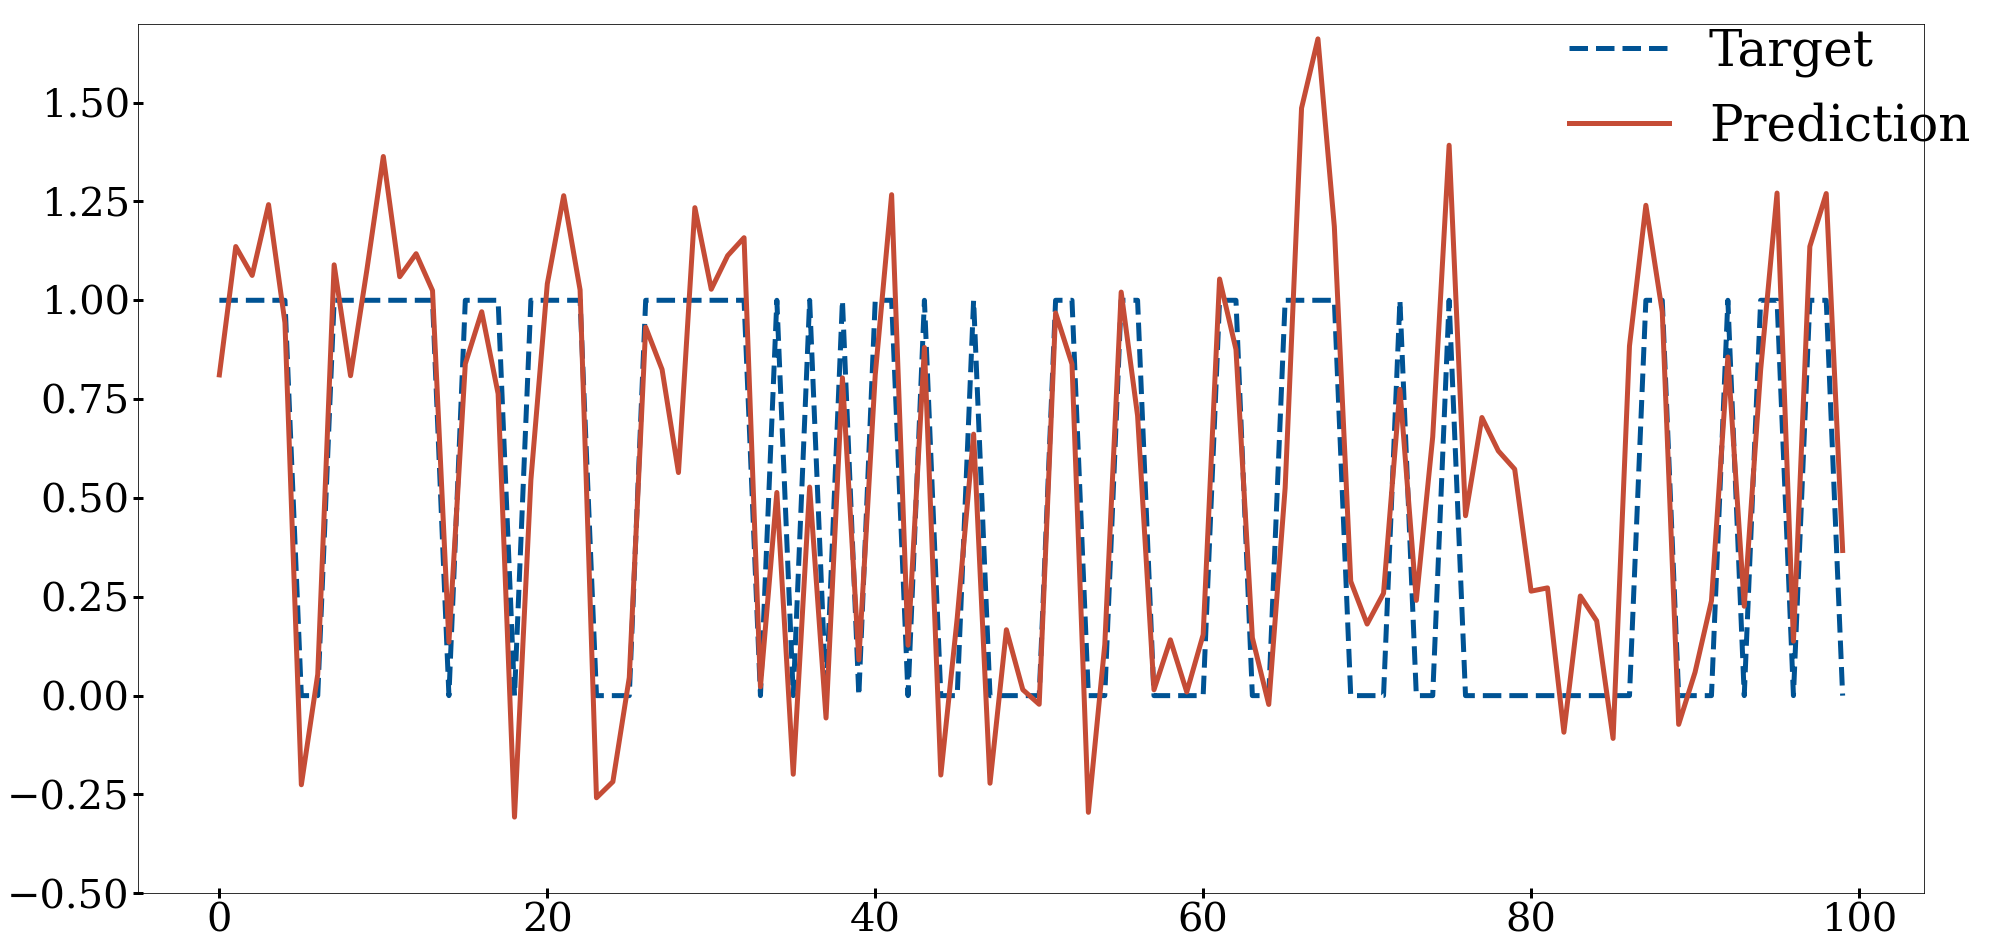

In [ ]:
# GENERALIZATION
fig = plt.figure(figsize = (32, 16))
font1 = {
        'weight': 'normal',
        'size': 50,
        }
ax = plt.subplot(111)
ax.tick_params(axis='both', which='major', labelsize=40, width = 3, length = 10, direction = 'inout')
ax.set_ylim(-0.5, 1.7)

plt.plot(signals[idx][1100-offset:1200-offset], label = 'Target', linewidth=5, linestyle = '--', color = '#005394')
plt.plot(gen, label = 'Prediction',linewidth=5, color = '#C54C36')
leg = plt.legend(frameon=False, loc=(0.79,0.83), prop = font1)
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=5)
fig.savefig(f'/content/gdrive/My Drive/QRC/ArticleProduction/Plots/GEN_PLOT_34.svg', format='svg', dpi=500)